# Karim Khalil

## **How effective are distance from home and ratio to median purchase price in detecting credit card fraud in online and offline transactions?**
## *REFINED: How does the distance from home affect the likelihood of credit card fraud in both online and offline transactions?*

Nowadays most of the population uses online shopping as their main way of purchasing goods and services, due to that, many credit card frauds have occurred by people putting their personal bank details into unreliable websites. Having a passion for problem-solving, I finds this research topic very intriguing and interesting. This research question aims to investigate whether distance from home and ratio to median purchase price can be used as indicators to detect credit card fraud in online and offline transactions. The research will involve analyzing a dataset of credit card transactions to identify patterns and trends in the data.The results of this research could potentially inform the development of more effective fraud detection techniques and strategies

In [67]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
mydata = pd.read_csv("../data/raw/card_transdata.csv")
mydata = mydata.dropna(subset=['distance_from_home'])
mydata = pd.DataFrame(mydata)
mydata = mydata.dropna(axis=1,how='any')
mydata = mydata[(mydata['distance_from_last_transaction'] < 75) & (mydata['ratio_to_median_purchase_price'] < 30)&(mydata['distance_from_home'] < 400)]
midpoint = len(mydata) // 170
mydata = mydata.iloc[:midpoint]
mydata

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
5867,0.617693,0.312484,2.145349,0.0,1.0,0.0,1.0,0.0
5868,250.085638,0.602155,3.006006,1.0,0.0,0.0,0.0,0.0
5869,20.263482,2.173456,4.594429,1.0,0.0,0.0,1.0,1.0
5870,8.587990,0.310802,1.880057,1.0,0.0,1.0,0.0,0.0


In [3]:
bins = pd.cut(mydata["distance_from_home"], bins=10)
df_byrange = mydata.groupby(bins).mean()
df_byrange

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,,,,,,,,
"(-0.345, 39.45]",10.920225,3.558476,1.755313,0.86106,0.338693,0.107194,0.653886,0.067615
"(39.45, 78.852]",54.999626,3.433072,1.679702,1.00000,0.353242,0.093857,0.602389,0.040956
"(78.852, 118.253]",97.830022,3.655367,1.839285,1.00000,0.319277,0.132530,0.650602,0.246988
"(118.253, 157.654]",136.728777,3.663112,1.573630,1.00000,0.312500,0.100000,0.725000,0.450000
"(157.654, 197.055]",175.902953,3.362237,1.283919,1.00000,0.347826,0.108696,0.608696,0.391304
"(197.055, 236.457]",214.583764,5.191372,1.636373,1.00000,0.269231,0.230769,0.730769,0.423077
"(236.457, 275.858]",254.499834,1.551789,1.168488,1.00000,0.222222,0.055556,0.666667,0.388889
"(275.858, 315.259]",295.236921,4.164168,1.500914,1.00000,0.363636,0.363636,0.636364,0.272727
"(315.259, 354.66]",335.351703,6.859311,1.810747,1.00000,0.600000,0.100000,0.600000,0.200000


In [4]:
!pip install openpyxl

In [5]:
df_byrange.to_excel('table.xlsx', index=False)

## Use of bins 
#### Due to the very large dataset we are using, I decided to use the bins in order to make my graphs on jupyter lab and tableau to make more sense and to have a better understanding of our dataste! ####

In [6]:
mydata.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000
mean,24.239929,3.555080,1.740174,0.883853,0.339135,0.107186,0.649836,0.081854
std,41.042181,7.453143,2.321244,0.320429,0.473457,0.309376,0.477062,0.274166
min,0.049270,0.001448,0.016933,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.960647,0.297841,0.490322,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.138910,0.976726,0.997455,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.839309,3.164822,2.033679,1.000000,1.000000,0.000000,1.000000,0.000000
max,394.061385,74.528852,27.939333,1.000000,1.000000,1.000000,1.000000,1.000000


# Using the describe
I can now see the mean, std, min and many other facts about my data without having to do it all manually which would take forever
The main variables i will be testing out with are the distance from home, ratio to median purchase price, online order, and fraud.
Using the table given, I can see and study a few statistics about each column i'm going to further exam.
First thing i would want to inpect is the count. We can see that we have reached the minimum required number of data points 5k which is a great start! 
Second thing is the mean. We can see that the average distance from home is 24.5 with a min of 0.0049 and high of 394 and the median of the data is 10.19 and a standard deviation of 41.9. Having known the preceeding fact, I can now tell that we are going to have a tropical range of data in that column so we will be able to examine with a different Variety of numbers which is a great thing! Now we do the same analysis with the ratio to median purchase price. The mean is given to be 1.7, the min is Approximately 0, the max is 2.02, the median is 0.994, and finally the standard dev is 2.3. Now for the online orders we can easily tell that approximately have the data will be online and the other will be offline since the mean is 0.65 and we are basically adding a bunch of 0's and 1's to get the average. Finally for the fraud column we can see that we will end up having a bit more than 8% of the data detecting a fraud in transaction (0.08 mean) which is a relatively decent amount to help prove my reserach question.

In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5803 entries, 0 to 5871
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              5803 non-null   float64
 1   distance_from_last_transaction  5803 non-null   float64
 2   ratio_to_median_purchase_price  5803 non-null   float64
 3   repeat_retailer                 5803 non-null   float64
 4   used_chip                       5803 non-null   float64
 5   used_pin_number                 5803 non-null   float64
 6   online_order                    5803 non-null   float64
 7   fraud                           5803 non-null   float64
dtypes: float64(8)
memory usage: 408.0 KB


## Using the info method
This method shows me that i have a few columns that are unnamed and filled with nan. (This was there from the data i dowloaded). Therefore, i now know that there may be a case where i will have to drop a few columns further into my research. This also shows me that we have a total number of rows of 891907 but i have 29959 empty rows (891907-861948) which is also may have to remove.

In [8]:
mydata.duplicated().sum()

0

In [9]:
mydata.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.009711,-0.019772,0.204124,0.002871,0.009958,0.002851,0.204714
distance_from_last_transaction,0.009711,1.000000,-0.004114,0.015800,-0.001486,-0.005370,0.008131,0.058313
ratio_to_median_purchase_price,-0.019772,-0.004114,1.000000,0.018124,0.008359,-0.024739,0.018332,0.532919
repeat_retailer,0.204124,0.015800,0.018124,1.000000,0.007472,-0.008270,0.020283,0.016028
used_chip,0.002871,-0.001486,0.008359,0.007472,1.000000,-0.025818,-0.003722,-0.062524
used_pin_number,0.009958,-0.005370,-0.024739,-0.008270,-0.025818,1.000000,-0.013077,-0.101423
online_order,0.002851,0.008131,0.018332,0.020283,-0.003722,-0.013077,1.000000,0.202048
fraud,0.204714,0.058313,0.532919,0.016028,-0.062524,-0.101423,0.202048,1.000000


## Using the corr method
This method will show me how correlated these variables are. But the catch is i can only really use this for columns that have 1 or 0 as outputs (true or false). Therefore, i can go straight into the columns "online_order" and "fraud". We can see that these 2 have a somewhat "weak" correlation of only 0.19. So we can't really come with a conclusion straight away stating that if an order was online or not then it has a higher chance of it being a fraud.

In [10]:
stats_summary = mydata.describe().T
stats_summary
#this will produce a table including unnamed columns, remove the columns
#Drop any rows where all the values are NaN 
dataset_wc = stats_summary.dropna()
dataset_wc

,count,mean,std,min,25%,50%,75%,max
distance_from_home,5803.0,24.239929,41.042181,0.049270,3.960647,10.138910,25.839309,394.061385
distance_from_last_transaction,5803.0,3.555080,7.453143,0.001448,0.297841,0.976726,3.164822,74.528852
ratio_to_median_purchase_price,5803.0,1.740174,2.321244,0.016933,0.490322,0.997455,2.033679,27.939333
repeat_retailer,5803.0,0.883853,0.320429,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,5803.0,0.339135,0.473457,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,5803.0,0.107186,0.309376,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,5803.0,0.649836,0.477062,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,5803.0,0.081854,0.274166,0.000000,0.000000,0.000000,0.000000,1.000000


[Text(0.5, 1.0, 'Online or not Online')]

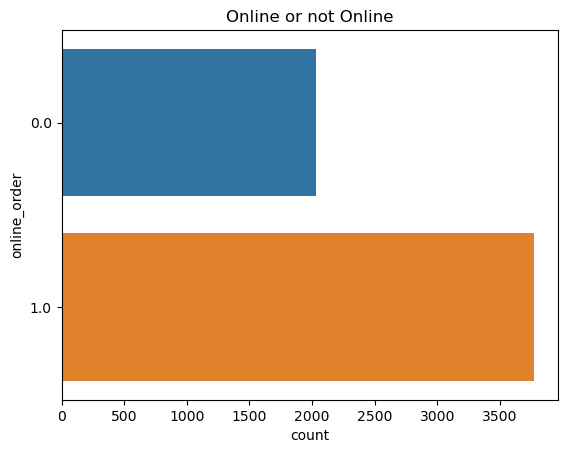

In [11]:
sns.countplot(y= mydata["online_order"]).set(title="Online or not Online")

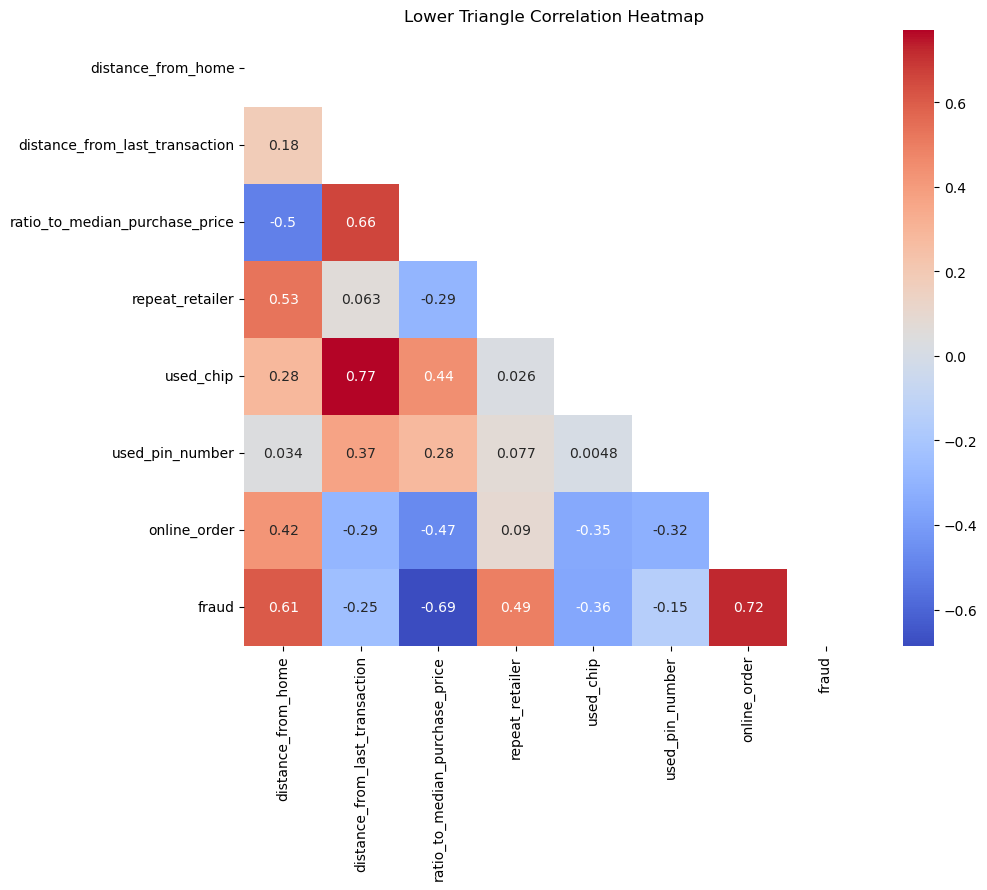

In [36]:

corr_matrix = df_byrange.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Lower Triangle Correlation Heatmap')
plt.show()

## Analysis: ##
Here i have created a very informative heatmap using the bins i have created! We can see quite a few correlations with all the varuables we now have. A few that have caught my eye would be the following:

1)  Distance from home vs Ratio to median purchase price: Here we see that there is a very strong inverse relation with the two 
2)  Distance from home vs Fraud: Here we see that we have a very strong positive correltion where when one increases, so does the other!
3)  Fraud vs Online order: Here we can also see a strong positive but somewhat obvious correlation with online orders and frauds.
4)  Distance from last transaction vs Used chip: Now although this may not be my varibles of concentration within my dataset, it shows the strongest correlation within it which is a good thing to keep at the back of our mind! 
5)  Finally, Distance from home vs used_chip/used_pin_number: Here we can see that these 2 variables have the weakest correlation with distance from home but the good news is that these variables are not the concentration of my research question so we will not have to worry much about such an analysis. 


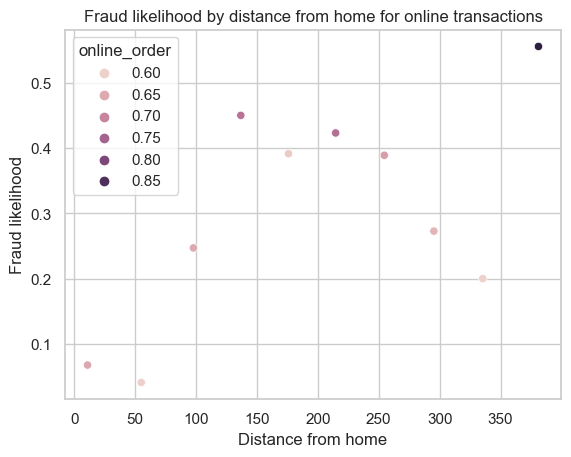

In [68]:
sns.scatterplot(x='distance_from_home', y='fraud', hue='online_order', data=df_byrange)
plt.title('Fraud likelihood by distance from home for online transactions')
plt.xlabel('Distance from home')
plt.ylabel('Fraud likelihood')
plt.show()

## Analysis: ##
#### Now diving deeper into the dataset using the above scatterplot we can closely verify that indeed as distance form home increases the hances of a fraud also increases which is a great step ahead to finialize our answer to the research question ####

## IMP INFO REGARDING DATASET: ##

 Unfortunately, the dataset does not provide any information on the units of the variables. Therefore, we can only make assumptions based on their descriptions:

"distance_from_home": This variable could be measured in miles, kilometers, or any other unit of distance.
"distance_from_last_transaction": Similarly to "distance_from_home", this variable could also be measured in different units of distance.
"ratio_to_median_purchase_price": This variable is likely measured in a percentage or a decimal, representing the ratio of the transaction amount to the median purchase price.

## Research Subquestions ##

We can ask additional subquestions such as:

**1) Are there any differences in the distribution of the variables between online and offline transactions?**

**2) What is the distribution of the "repeat_retailer" variable and how does it relate to fraud?**

**3) Is there any correlation between the "distance_from_home" and "distance_from_last_transaction" variables?**



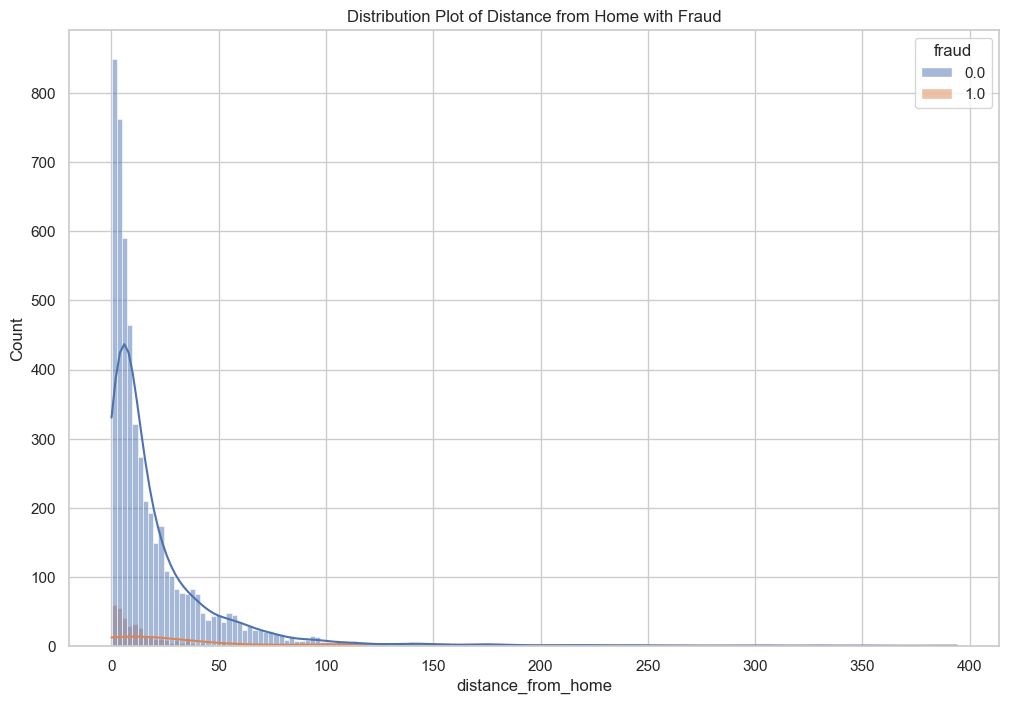

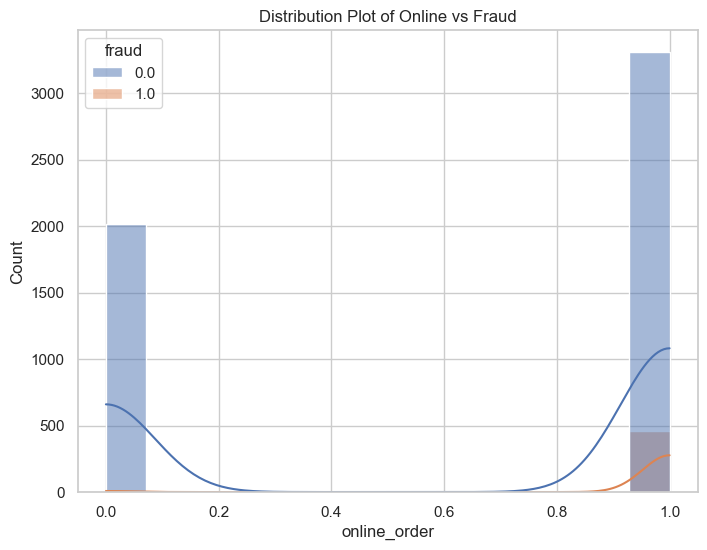

In [70]:
# Distribution plot of distance from home with hue as fraud
plt.figure(figsize=(12,8))
sns.histplot(mydata, x="distance_from_home", hue="fraud", kde=True)
plt.title('Distribution Plot of Distance from Home with Fraud')
plt.show()

# Distribution plot of ratio to median purchase price with hue as fraud
plt.figure(figsize=(8,6))
sns.histplot(mydata, x="online_order", hue="fraud", kde=True)
plt.title('Distribution Plot of Online vs Fraud')
plt.show()

## Analysis: ##

#### 
- We updated the count plots with distribution plots and added the hue parameter to differentiate the fraud and non-fraud transactions. The first distribution plot shows the distribution of distance from home for fraud and non-fraud transactions. Here one may say that the fraudulent transaction are higher at lower distance from home, but... this is definitely not the right conclusion we can make yet! matter of fact we can see that, yes, the number of fauds is lower when the distance increases but we can also see that ratio wise, the number of frauds in comparasion to the number of non frauds shows that the probability of a fraud occuring is approximately 10%. 
- For side research question reasons, i have decided to create a second distribution plot that shows the distribution of Online/Offline purchases for fraud and non-fraud transactions. We can now see with more details that infact almost all if not then all of our Fraudulentl transaction were made onlnine. 
####

(0.0, 1550.0)

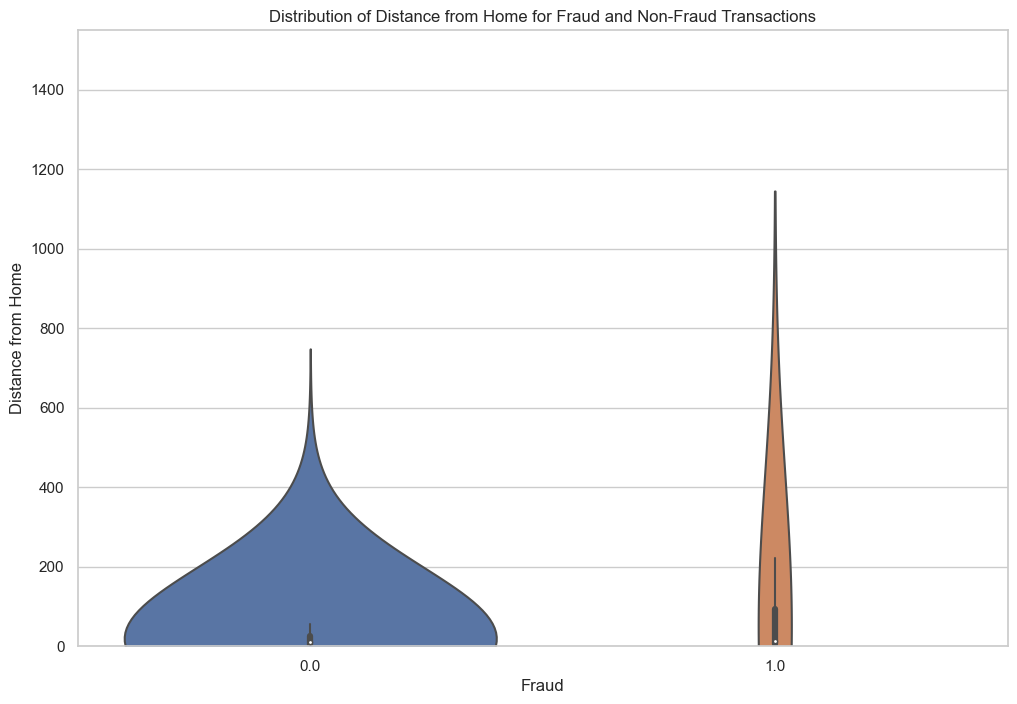

In [66]:
plt.figure(figsize=(12,8))
sns.violinplot(x="fraud", y="distance_from_home", data=mydata, scale="count",bw= 5)

plt.title("Distribution of Distance from Home for Fraud and Non-Fraud Transactions")
plt.xlabel("Fraud")
plt.ylabel("Distance from Home")

plt.ylim(0, 1550)

## Analysis: ##

This plot shows the distribution of distance from home for fraud and non-fraud transactions using a violin plot. The x-axis represents whether the transaction is a fraud or not, and the y-axis represents the distance from home in miles. The width of the violin plot represents the density of data points at each value, with the wider sections indicating a higher density of points.

We can see that for non-fraud transactions, the majority of the transactions have a distance from home between 0 to 200 miles, and there is a long tail of transactions with a distance up to 750 miles. This shows the density of data points with distance from home less than 200 which are not a fraud are way denser than the distance from home that is less than 200 which are detected to being a fraud. To analyze this plot one can take the raito/probability of frauds to non frauds depending on the distance from home. so from distance 0-250 the chances of a transaction being a fraud is much lower than when the distance is 250+. it goes from a 50/50 chance that a fraud will be detected to almost being gGuaranteed that thee transaction was a fraud when the distances goes 600+. 

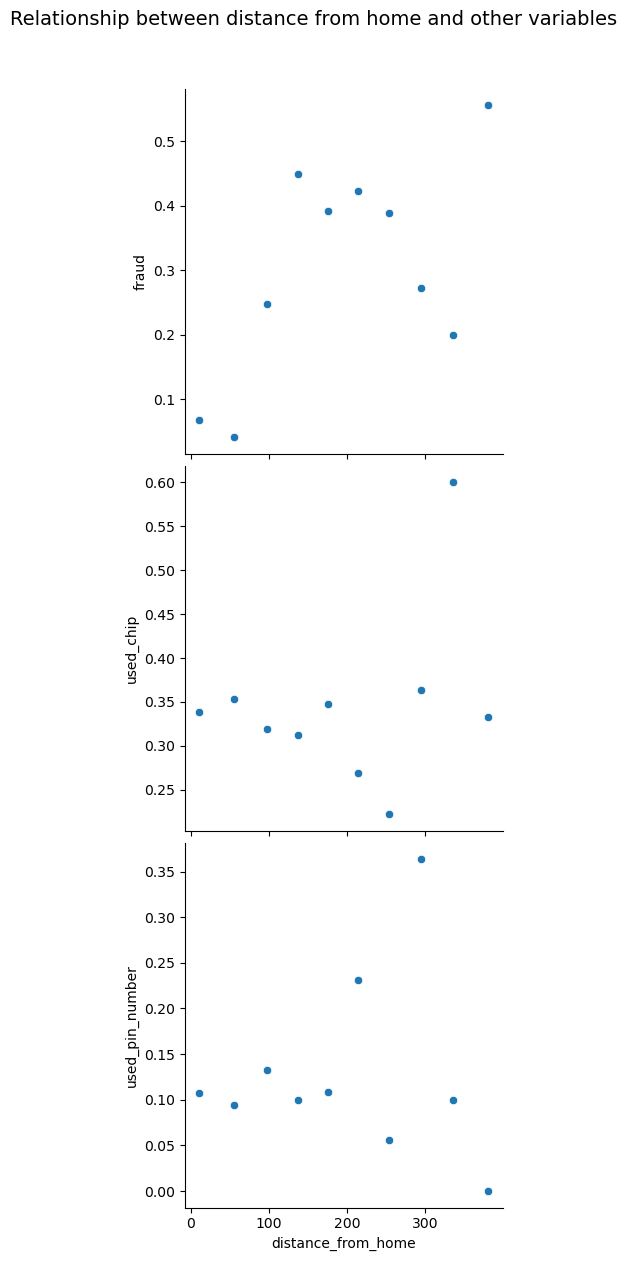

In [47]:
sns.pairplot(df_byrange, x_vars=['distance_from_home'], y_vars=['fraud', 'used_chip', 'used_pin_number'], height=4)
plt.suptitle('Relationship between distance from home and other variables', y=1.05, fontsize=14)
plt.show()

## Analysis: ##
#### Here i have decide to create a few scatter plots above each other to maybe see if there would be a correlation with one anohter. ####
- From the above plots we can see that most frauds occur when the distance form home is less than Approximately 5000. If we also look closer we can see a somewhat positive linear correlation with the 2.  ####
- Now looking at the dist from home vs used chip we can conclude that there is really no correlation that we can further dive deeper into for our subquestions.
- Finally the last plot of dist fro home vs used pin number we can see a very slight inverse correlation with the 2. where when the pin number was not used the distance from home increases. we also know that as dist from home increases the chances of a fraud also increased. which may also lead us to observe that maybe when the pin isnt being used then the chances of fraud protection Drastically decreases. 

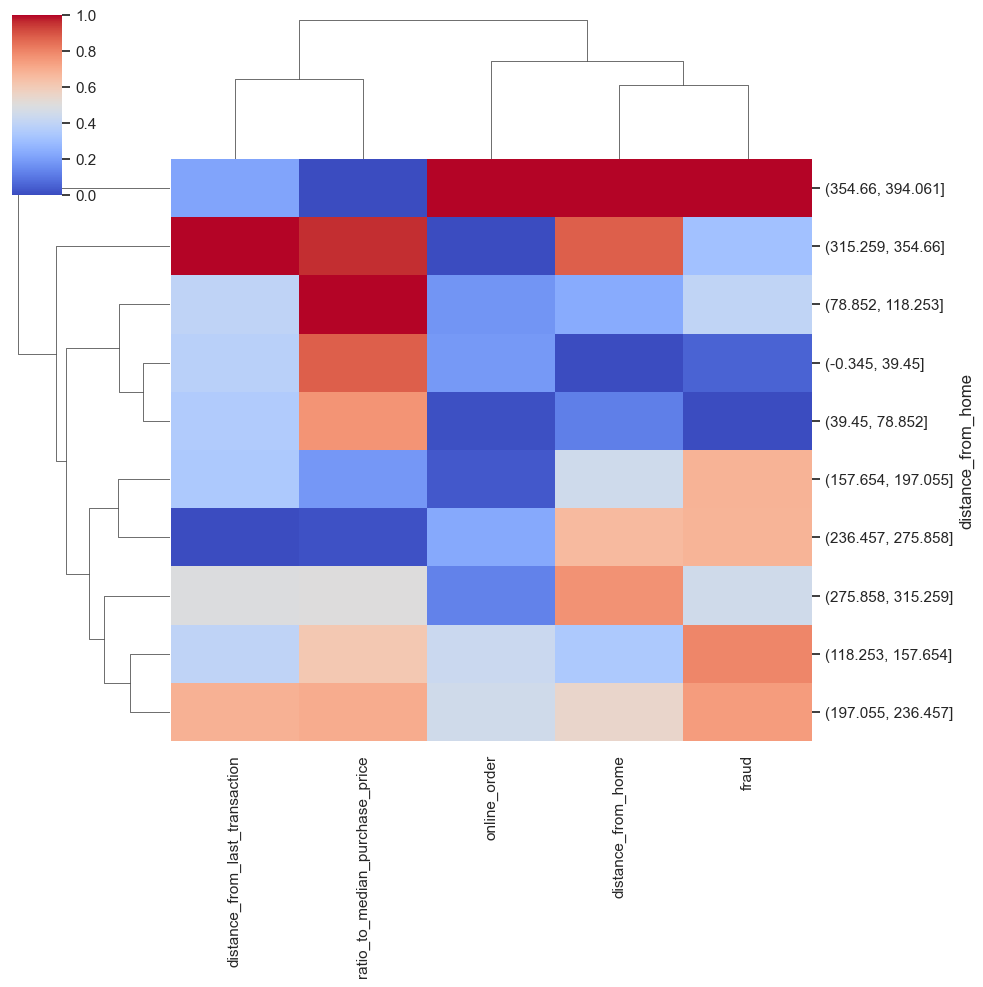

In [64]:
cols = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'online_order', 'fraud']
data = df_byrange[cols]

# Create the cluster map
sns.clustermap(data, cmap='coolwarm', standard_scale=1)

## Analysis: ##
#### Here we can see from the help of the clustermap that distance from home is a critical factor when it comes to most variables in the dataset we are dealing with. We can see that when the distance is increasing, the color moves toward the more concentracted side. When the distance is at it's highest ~400, we see that the color's are red for quite a few variables meaning that the concentration is at a very high point.The 2 most important varuables i am dealing with are fraud and online/offline transactuons. here they are both strongly correalted to one another whihc is a great observation! ####

<AxesSubplot:xlabel='distance_from_home', ylabel='fraud'>

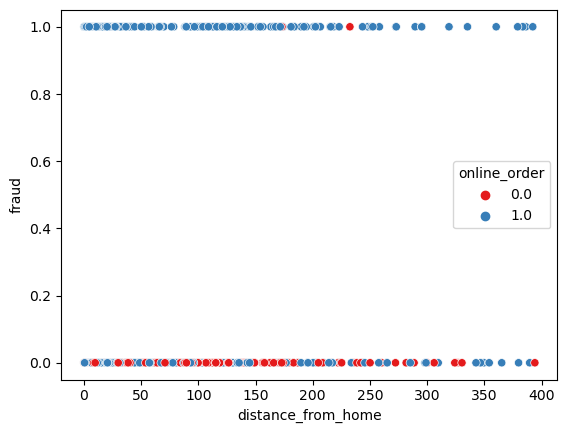

In [18]:
import seaborn as sns

df_filtered = mydata[['distance_from_home', 'online_order', 'fraud']]

df_filtered = df_filtered.fillna(value={'online_order': False, 'fraud': False})

sns.scatterplot(data=df_filtered, x='distance_from_home', y='fraud', hue='online_order', palette='Set1')

## Analysis: ##
#### Now this graph may seem not very informtive but we can actually come with a conclusion that the magority of online orders with the range of distance from home of 0,200 has a much higher chance of it being a fraud. ####

/var/folders/qh/nw_ntqk50l59gbqw941yj8cw0000gn/T/ipykernel_4140/2906588040.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = heatmap_data.pivot('distance_from_home', 'ratio_to_median_purchase_price', 'fraud')


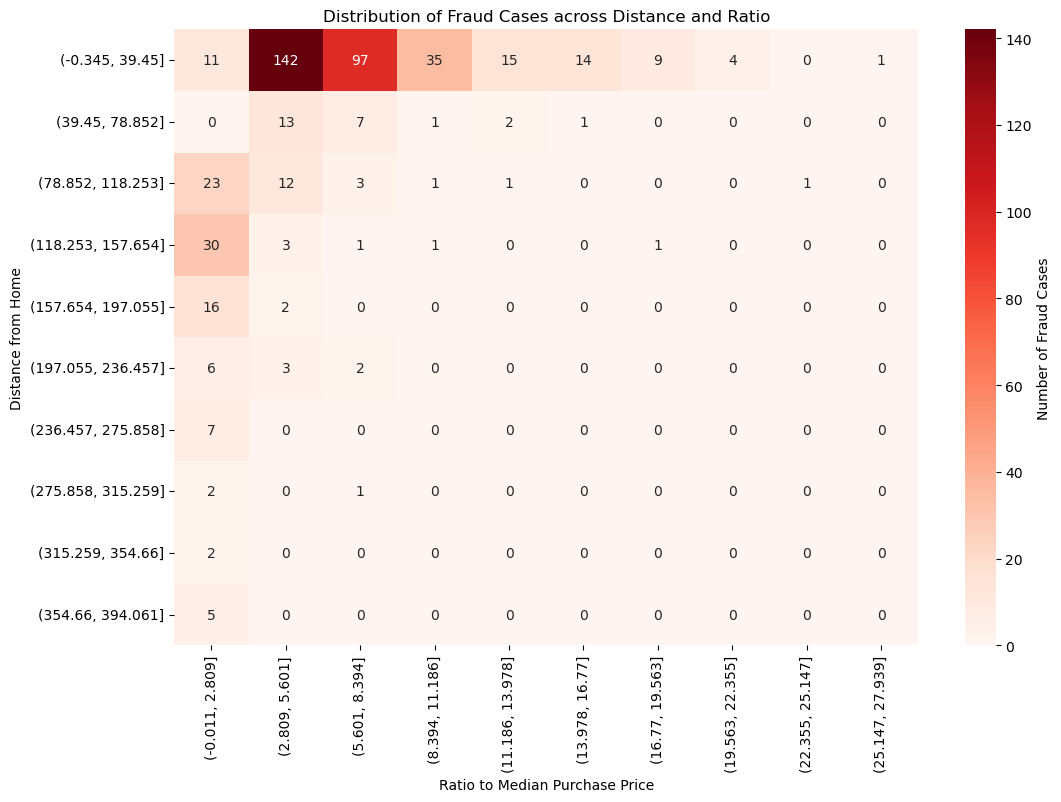

In [19]:
df_heatmap = mydata[['distance_from_home', 'ratio_to_median_purchase_price', 'fraud']].dropna()

bins_dist = pd.cut(df_heatmap['distance_from_home'], bins=10)
bins_ratio = pd.cut(df_heatmap['ratio_to_median_purchase_price'], bins=10)

heatmap_data = df_heatmap.groupby([bins_dist, bins_ratio])['fraud'].sum().reset_index()

heatmap_data = heatmap_data.pivot('distance_from_home', 'ratio_to_median_purchase_price', 'fraud')

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='g', cbar_kws={'label': 'Number of Fraud Cases'})
ax.set_xlabel('Ratio to Median Purchase Price')
ax.set_ylabel('Distance from Home')
plt.title('Distribution of Fraud Cases across Distance and Ratio')
plt.show()

## Analysis: ##
#### This shows us that fraud cases tend to increase when distance from home less than 39.45 and ratio to median price is in the range of around 2.8,11.19. But since the dataset we are using has Significantly more transactions within that range, we cannot come with the conclusion that the chances are higher when the distance is the short from home. Instead, we can see how when the distance increases all the way up to 300+ the number of frauds are still relatively high when we keep into account the number of non fraudulent transactions that occured within that range (Using the graphs we made before). Therefore, our conclusion that when the distance from home is relatively high, the chances of the transaction is much higher. ####

<AxesSubplot:xlabel='online_order', ylabel='distance_from_home'>

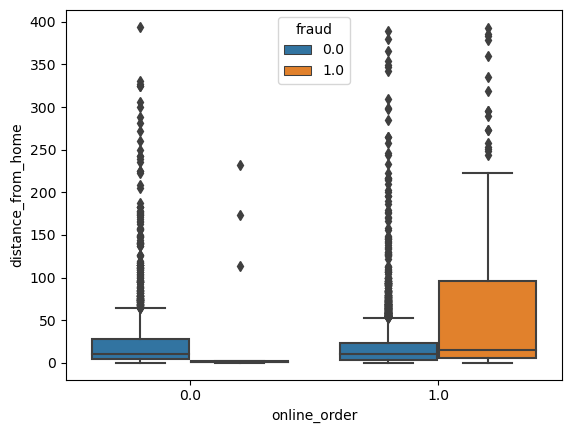

In [20]:
data_filtered = mydata[mydata['fraud'].isin([0, 1])]

sns.boxplot(x='online_order', y='distance_from_home', hue='fraud', data=data_filtered)

## Analysis: ##
#### Using this boxplot we can analyze quite a few things! First would be that we can see off the bat that the chances of a transation being a fraud when it offline is very minimal but when it's online there is a much greater chance of it being a fraud. Now going a bit into details of the boxplot we can see that when the distance from home is less than 100 and it being online then the chances of a fraud is much higher. This graph is a very useful graph that will help us get close to answering our reserach question. That is because we see that frauds mainlt occur when the the payment was made online and when the dustance of the transaction. is less than 100. ####

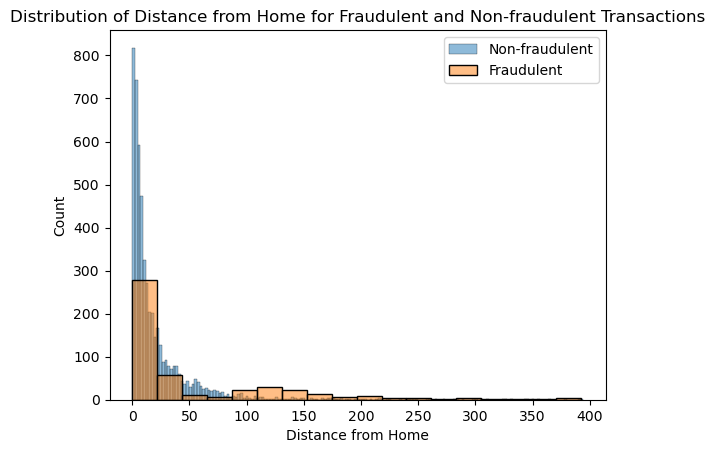

In [21]:
fraud_nonfraud = mydata.loc[(mydata['fraud'] == 1) | (mydata['fraud'] == 0)]

sns.histplot(fraud_nonfraud.loc[fraud_nonfraud['fraud'] == 0]['distance_from_home'], alpha=0.5, label='Non-fraudulent')
sns.histplot(fraud_nonfraud.loc[fraud_nonfraud['fraud'] == 1]['distance_from_home'], alpha=0.5, label='Fraudulent')

plt.title('Distribution of Distance from Home for Fraudulent and Non-fraudulent Transactions')
plt.xlabel('Distance from Home')
plt.ylabel('Count')
plt.legend()

plt.show()

## Analysis: ##
Finally using this graogh we can can summarize a few important claims about my research question.
1) when the distance form home is <25 the probability of a fraud is approximaily 20-25%
2) when the distance from home is >25 and <100 it's almost a 50% chance of detecting a fruad
3) when the distance from home is >100 then the Probability increases up to 80-90%

**Using the last few graphs we can see the when a transaction was made online and there was no fraud detected then the distance from home was <25. Frauds began getting detected mostly when the distance was greater then 25. In conclusion we finally see that there is a correlation with our plots where when the ditance from home increases and the transaction was made online, then the Probability of a fraudulent transaction increases up to 80%**

------

## **Final Conclusion** ##
In conclusion, after graphing and analyzing all the plots I have generated, answering my research question "How does the distance from home affect the likelihood of credit card fraud in both online and offline transactions" was quite difficult to analyze due to the dataste selected and it's limitation but i managed to come to somewhat a decent conclusion. Using the graphs generated i can come with the conclusion that as the distance from home increases, the chances of an order being online increases. That logically makes sense. For example, when one wants to buy a product that is further away from where one is located they tend to purchase it online. As the distance from home increases, we also saw that the chances of a fraud occurs increases. That conclusion also tends to make sense because if one attemps scam another person, the chances that the scammer is located anywhere near the person home is slight to none.Looking at one of the boxplots i made above we can see there are almost no frauds detected when the transaction was made offline .Combining the 3 final statments and the graphs made above that support the claims, we can indeed say that as the distance from home increases and the transaction was made online, the chances of a fraudulent transaction significanlty increases.